<a href="https://colab.research.google.com/github/marivic9/EDA-CS-103/blob/main/act4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


**Packages**

In [56]:
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
import calendar

In [57]:
filename = 'StudentsPerformance.csv'
names = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
students = read_csv("/gdrive/MyDrive/Colab Notebooks/act4/StudentsPerformance.csv")

# **Data Reading**

In [58]:
students.shape

(1000, 11)

In [59]:
students.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average,Grade,Passed / Failed,Output
0,female,group B,bachelor's degree,none,72,72,74,72.67,C,PASSED,1
1,female,group C,some college,completed,69,90,88,82.33,F,FAILED,0
2,female,group B,master's degree,none,90,95,93,92.67,A,PASSED,1
3,male,group A,associate's degree,none,47,57,44,49.33,F,FAILED,0
4,male,group C,some college,none,76,78,75,76.33,C,PASSED,1


In [60]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   test preparation course      1000 non-null   object 
 4   math score                   1000 non-null   int64  
 5   reading score                1000 non-null   int64  
 6   writing score                1000 non-null   int64  
 7   average                      1000 non-null   float64
 8   Grade                        1000 non-null   object 
 9   Passed / Failed              1000 non-null   object 
 10  Output                       1000 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


In [61]:
students.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.08900,15.163080,0.0,57.00,66.00,77.00,100.0
reading score,1000.0,69.16900,14.600192,17.0,59.00,70.00,79.00,100.0
writing score,1000.0,68.05400,15.195657,10.0,57.75,69.00,79.00,100.0
average,1000.0,67.77058,14.257311,9.0,58.33,68.33,77.67,100.0
Output,1000.0,0.40900,0.491895,0.0,0.00,0.00,1.00,1.0


In [62]:
students['Output'].value_counts()

,count
Output,
0,591
1,409


In [63]:
students.groupby('Output').agg('mean', numeric_only=True)

,math score,reading score,writing score,average
Output,,,,
0,56.201354,61.494078,60.299492,59.331591
1,80.376528,80.259169,79.259169,79.964817


# **Data Cleaning**

In [64]:
missing_values_count = students.isnull().sum()
missing_values_count[0:10]

,0
gender,0
race/ethnicity,0
parental level of education,0
test preparation course,0
math score,0
reading score,0
writing score,0
average,0
Grade,0
Passed / Failed,0


In [65]:
total_cells = np.product(students.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [66]:
duplicates = students.duplicated()
print('Duplicate rows = %d' % (duplicates.sum()))

Duplicate rows = 1


In [67]:
students.drop_duplicates(inplace=True)

In [47]:
duplicate_counts = students.value_counts()

if (duplicate_counts > 1).any():
  print("Duplicates still exist")
else:
  print("No duplicates found")

No duplicates found


# **Data Analysis**

**Visualization:** Histogram

**Hypothesis 1:** Students whose parents have a higher level of education (such as a bachelor's degree or higher) are more likely to attend or perform better in school compared to students whose parents have lower levels of education.

**Conclusion 1:** The majority of students come from families where the parents have completed a bachelor's degree or some college education, while the fewest students come from families where parents only completed some high school.

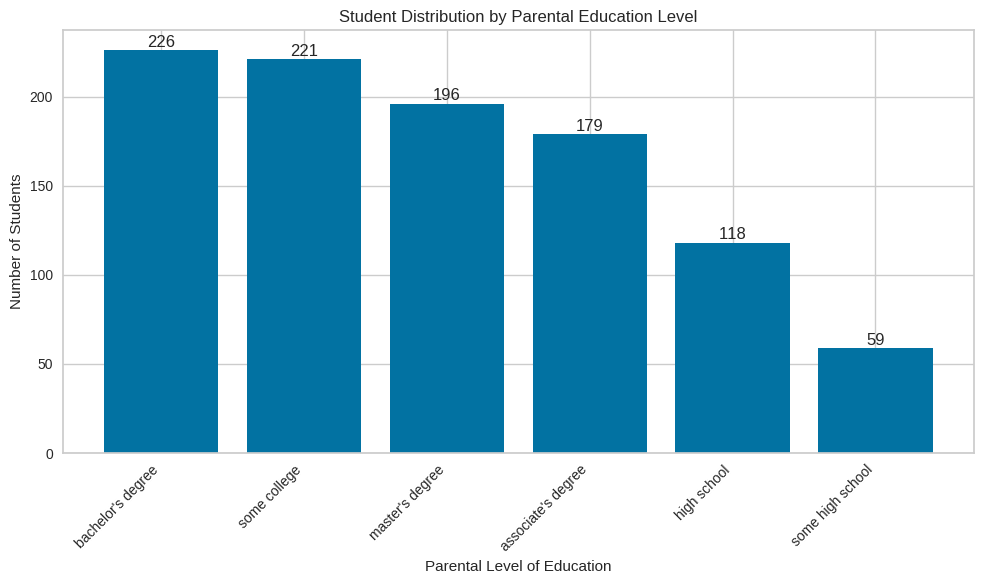

In [79]:
parental_education_levels = students['parental level of education'].unique()
student_counts = students['parental level of education'].value_counts()

figure, axis = plt.subplots(figsize=(10, 6))
plt.xticks(range(len(parental_education_levels)), parental_education_levels, rotation=45, ha='right')
plot = axis.bar(range(len(parental_education_levels)), student_counts)

for rectangle in plot:
  height = rectangle.get_height()
  axis.text(rectangle.get_x() + rectangle.get_width() / 2., 1.002 * height,
           '%d' % int(height), ha='center', va='bottom')

plt.xlabel("Parental Level of Education")
plt.ylabel("Number of Students")
plt.title("Student Distribution by Parental Education Level")
plt.tight_layout()
plt.show()

**Visualization:** Lollipop Chart

**Hypothesis 2:** The average math scores of students do not significantly vary with their parental education levels.

**Conclusion 2:**
The graph shows that students' average math scores are similar no matter their parents' education level.

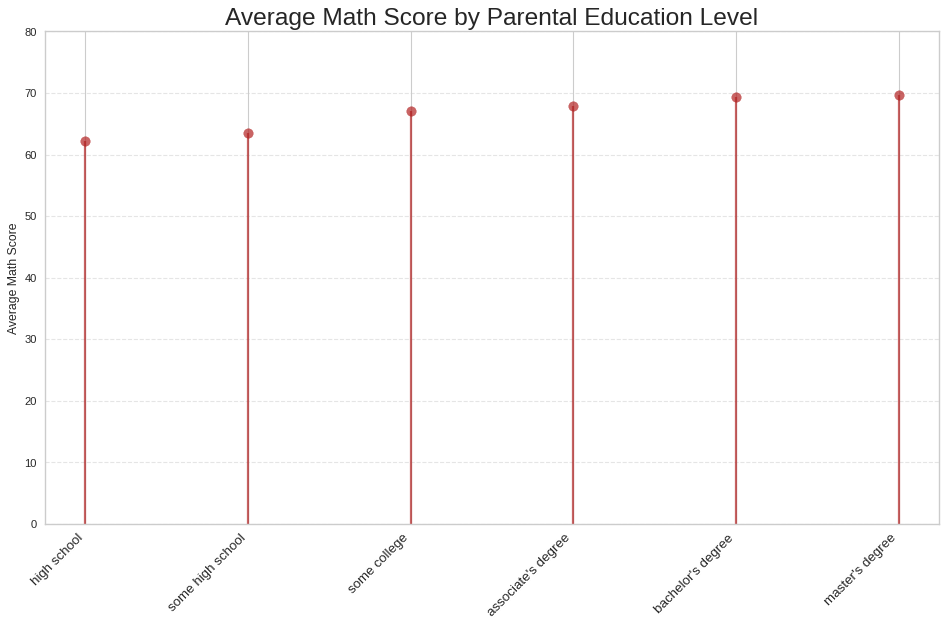

In [84]:
processedDF = students[['math score', 'parental level of education']].groupby('parental level of education').apply(lambda x: x.mean())
processedDF.sort_values('math score', inplace=True)
processedDF.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.vlines(x=processedDF.index, ymin=0, ymax=processedDF['math score'], color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=processedDF.index, y=processedDF['math score'], s=75, color='firebrick', alpha=0.7)

ax.set_title('Average Math Score by Parental Education Level', fontdict={'size': 22})
ax.set_ylabel('Average Math Score')
ax.set_xticks(processedDF.index)
ax.set_xticklabels(processedDF['parental level of education'], rotation=45, ha='right', fontdict={'size': 12})
ax.set_ylim(0, 80)

ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

**Visualization:** Density Plot

**Hypothesis 3:** Student performance in math, reading, and writing tends to be normally distributed, with most students scoring around the average range, while extreme low or high scores are less common.

**Conclusion 3:** The math, reading, and writing scores all follow a similar pattern, with most scores around 75.

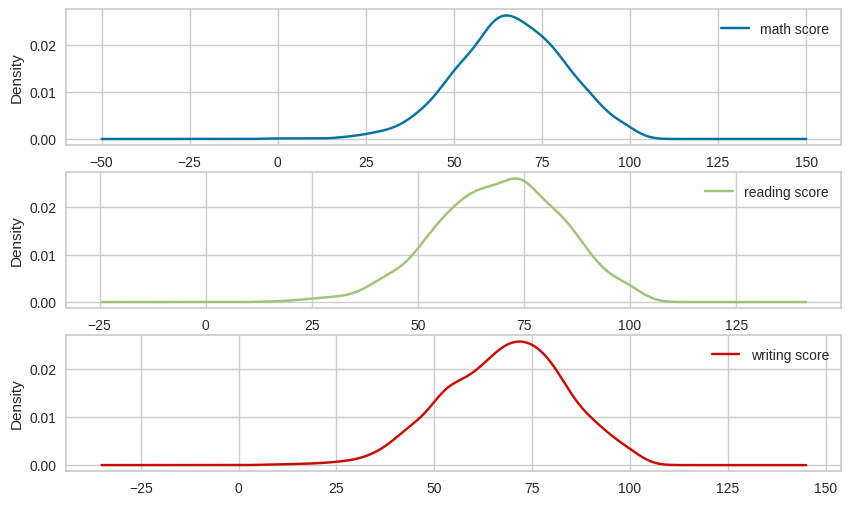

In [81]:
numerical_data = students[['math score', 'reading score', 'writing score']]

numerical_data.plot(kind='density', subplots=True, layout=(3, 1), sharex=False, figsize=(10, 6))
plt.show()

**Visualization:** Boxplot

**Hypothesis 4:** Students whose parents have higher levels of education (bachelor's or master's degrees) tend to have higher median math scores compared to students whose parents have lower levels of education (high school or some high school).

**Conclusion 4:** Math scores are similar across different parental education levels, with slightly higher scores for parents with degrees but wide score ranges for all groups.

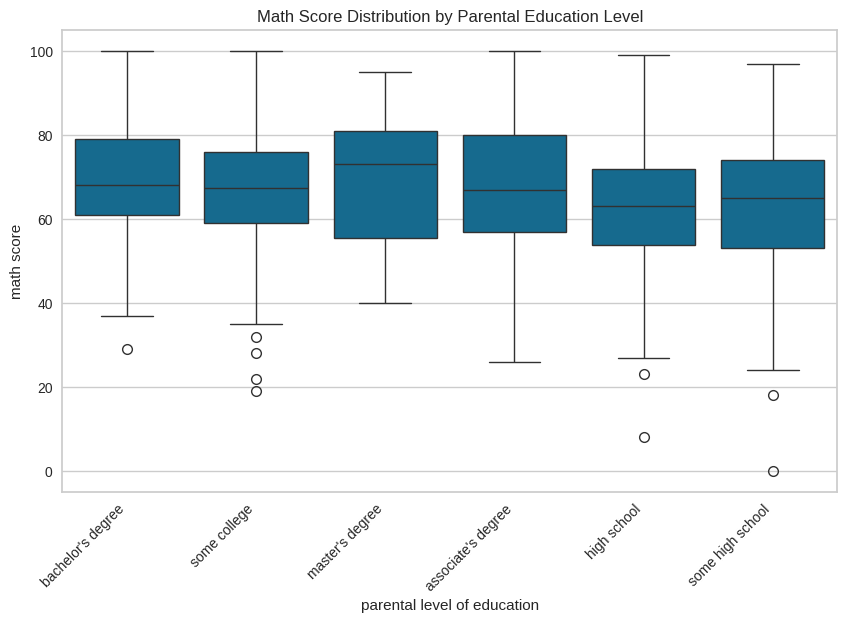

In [82]:
plt.figure(figsize=(10, 6))  # Set the figure size to 10 inches wide and 6 inches tall
sns.boxplot(x='parental level of education', y='math score', data=students)
plt.xticks(rotation=45, ha='right')
plt.title('Math Score Distribution by Parental Education Level')
plt.show()

**Visualization:** Scatter Plot

**Hypothesis 5:** There is a positive correlation between students' math scores and reading scores, meaning that students who perform well in math are likely to also perform well in reading.

**Conclusion 5:**
The scatter plot shows a strong positive correlation between math and reading scores, where higher math scores are generally associated with higher reading scores.

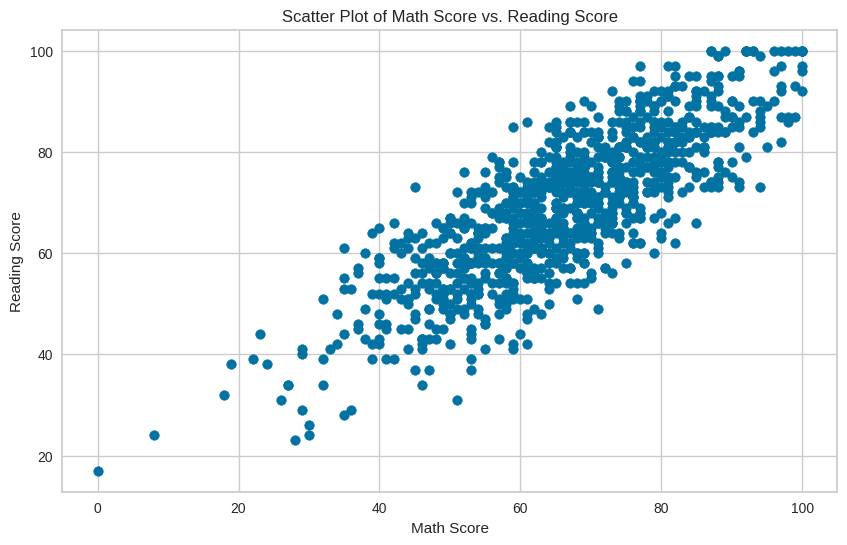

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(students['math score'], students['reading score'])
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Scatter Plot of Math Score vs. Reading Score')
plt.show()